In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm 
from scipy.stats import t
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

$N(\theta,1)$

In [5]:
alpha = 0.05
theta = np.linspace(-10, 10, 100)
#print(theta)
N = np.array([10**i for i in range(2,7)])
print(N)

[    100    1000   10000  100000 1000000]


t-Критерий Стьюдента: Применяется для проверки основной гипотезы $H_0 : E(X) = \theta$.Очевидно, при принятии основной гипотезы $E(\bar{X}) = \theta$. Используя несмещенную оценку дисперсии $s_X$ получаем t-критерий: $t_n = \frac{\bar{X} - E_\theta X}{s_X\sqrt{n}}$

Построим функцию мощности критерия Стьюдента проверки гипотезы $H_0: \theta = 0$ vs $H_1: \theta = \theta_1, \theta_1 \in [-10,10]$.$t_n = \sqrt{n}\frac{\bar{X} - E_\theta(X)}{s_x}$   
$z_{\alpha}$ - квантиль распределения Стьюдента.   
1)$ \theta_0 = 0 < \theta_1$:
$$P_{\theta_0}(t_{\theta_0} > z_{1-\alpha}) = \alpha$$
$$S = \{t_{\theta_0} > z_{1-\alpha} \}\text{, где }$$
$$\beta(\theta_1, S) = P_{\theta_1}(t_{\theta_0} > z_{1-\alpha}) = 
      P_{\theta_1}\left(t_{\theta_1} > z_{1-\alpha} -\frac{E_{\theta_1}(X) - E_{\theta_0}(X)}{s_x} \sqrt{n}\right) =
      1-F_{T_n}\left(z_{1-\alpha} -\frac{E_{\theta_1}(X) - E_{\theta_0}(X)}{s_x} \sqrt{n}\right),$$
      где $T_n -$ распределение Стьюдента.   
2)$ \theta_0 = 0 >\theta_1$:
$$P_{\theta_0}(t_{\theta_0} \leq z_{\alpha}) = \alpha$$
$$S = \{t_{\theta_0} \leq z_{\alpha} \}\text{, где }$$
$$\beta(\theta_1, S) = P_{\theta_1}(t_{\theta_0} \leq z_{\alpha}) = 
    P_{\theta_1}\left(t_{\theta_1} \leq z_{\alpha} -\frac{E_{\theta_1}(X) - E_{\theta_0}(X)}{s_x} \sqrt{n}\right) = 
    F_{T_n}\left(z_{\alpha} -\frac{E_{\theta_1}(X) - E_{\theta_0}(X)}{s_x} \sqrt{n}\right)$$

In [6]:
def var(Y):
    return ((len(Y)*np.var(Y)/(len(Y) - 1))**(1/2))

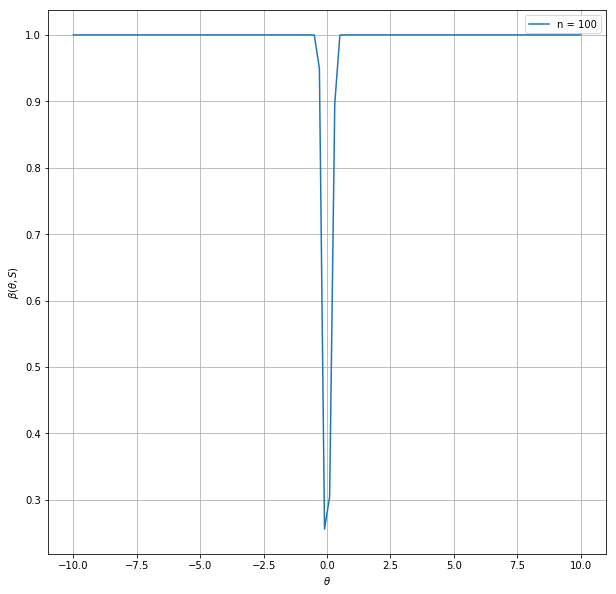

In [7]:
plt.figure(figsize = (10,10))
power = []
for th in theta:
    X = norm.rvs(size=100)
    if th < 0:
        z = t.ppf(alpha, df = len(X))
        power.append(t.cdf(z - th*np.sqrt(len(X)) / var(X), df = len(X)))
    else:
        z = t.ppf(1-alpha, df = len(X))
        power.append(1-t.cdf(z - th*np.sqrt(len(X)) / var(X), df = len(X)))
plt.plot(theta, power, label='n = 100')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\beta(\theta, S)$')
plt.grid()
plt.legend()

Построили функцию мощности критерия Стьюдента проверки гипотезы $H_0: \theta = 0$ vs $H_1: \theta = \theta_1, \theta_1 \in [-10,10]$ для размера выборки 100. Теперь исследуем поведение функции мощности при разных размерах выборки.

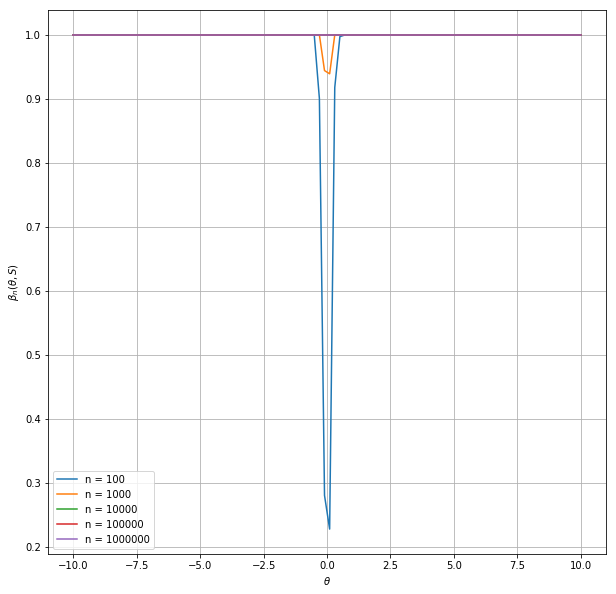

In [8]:
plt.figure(figsize = (10,10))
for n in N:
    power = []
    for th in theta:
        X = norm.rvs(size=n)
        if th < 0:
            z = t.ppf(alpha, df = n)
            power.append(t.cdf(z - th*np.sqrt(n) / var(X), df = n))
        else:
            z = t.ppf(1-alpha, df = n)
            power.append(1-t.cdf(z - th*np.sqrt(n) / var(X), df = n))
    plt.plot(theta, power, label='n = '+str(n))
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\beta_n(\theta, S)$')
plt.grid()
plt.legend()

Из графиков видно, что при $n \geq 10000$ мощность критерия Стьюдента равна единице, значит, вероятность совершить ошибку 2 рода практически нулевая. Это обьясняется тем, что при увеличении обьема выборки улучшается качество проверки гипотезы.

Теперь  найдем такое минимальное n, что при проверке гипотезы $H_0: \theta = \theta_0$ против альтернативы $H_1: \theta = \theta_1$, где $|\theta_0 - \theta_1| = 1 $, критерием Стьюдента уровня значимости 0.05 вероятность ошибки 1 рода меньше вероятности ошибки 2 рода.   
1)$H_0: \theta = \theta_0$ vs $H_1: \theta = \theta_1 = \theta_0 + 1$   
$$\beta(\theta, S) = P_{\theta_1}(t_{\theta_0} > z_{1-\alpha}) = 
      P_{\theta_1}\left(t_{\theta_1} > z_{1-\alpha} -\frac{E_{\theta_1}(X) - E_{\theta_0}(X)}{s_x} \sqrt{n}\right) =
      1-F_{T_n}\left(z_{1-\alpha} -\frac{\sqrt{n}}{s_x}\right),$$
      где $T_n -$ распределение Стьюдента.
2)$H_0: \theta = \theta_0$ vs $H_1: \theta = \theta_1 = \theta_0 - 1$    
$$\beta(\theta, S) = P_{\theta_1}(t_{\theta_0} \leq z_{\alpha}) = 
    P_{\theta_1}\left(t_{\theta_1} \leq z_{\alpha} - \frac{E_{\theta_1}(X) - E_{\theta_0}(X)}{s_x} \sqrt{n}\right) = 
    F_{T_n}\left(z_{\alpha} + \frac{\sqrt{n}}{s_x}\right)$$
Ошибка 1 рода = $\alpha$   
Ошибка 2 рода = $1 - \beta(\theta, S)$

In [9]:
theta = np.array([-9, -5, -1, 0, 1, 5, 9])
K = 80

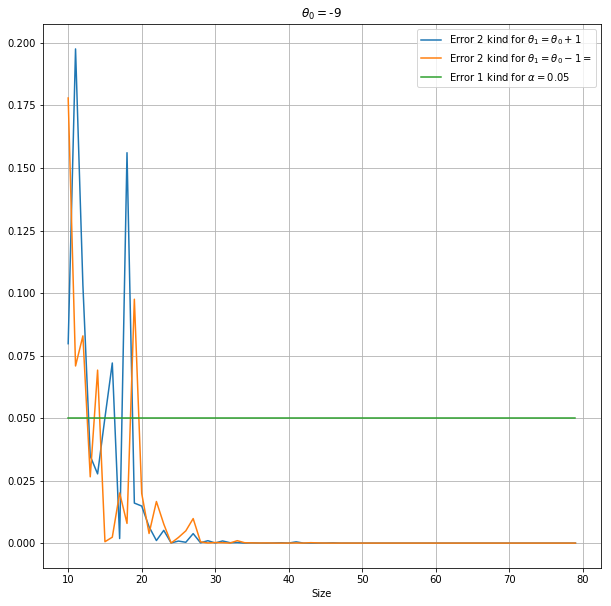

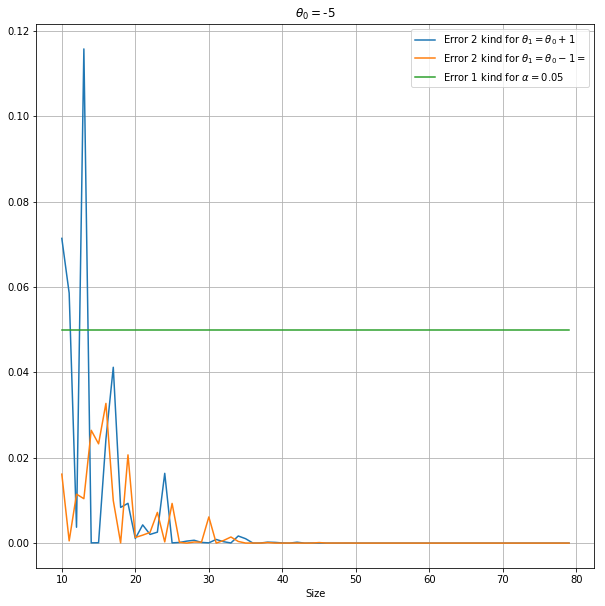

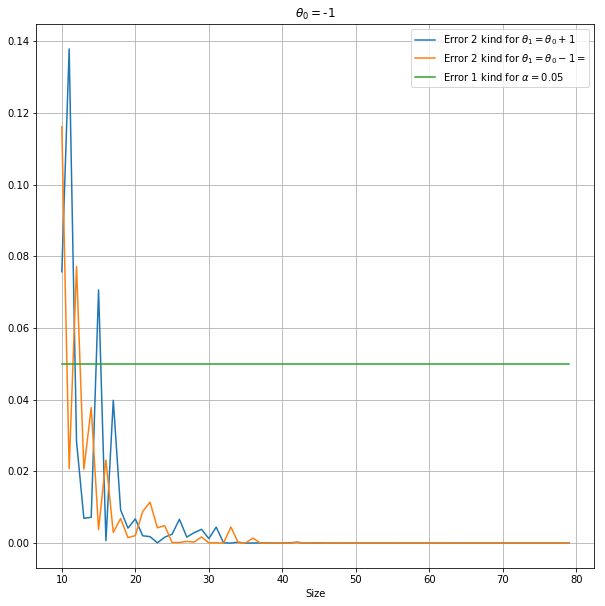

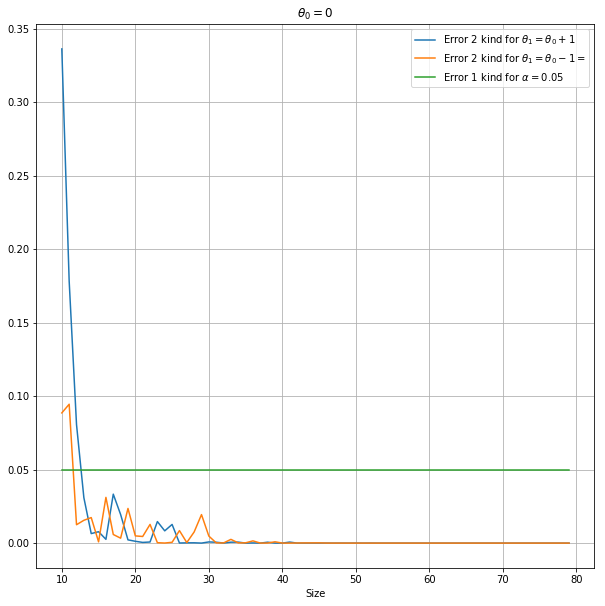

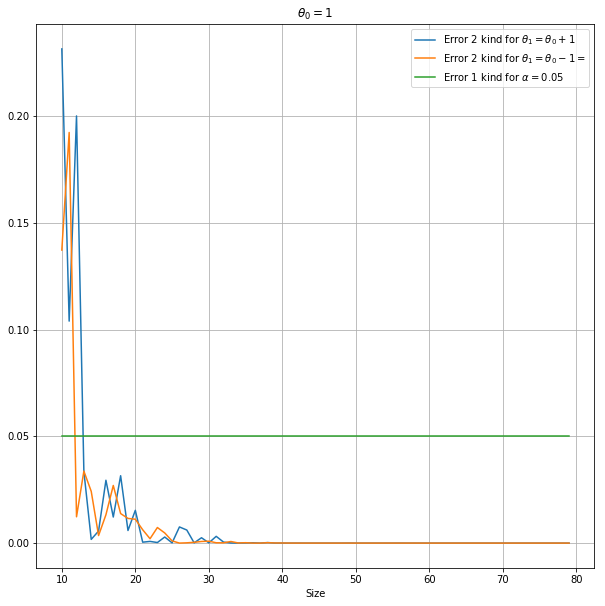

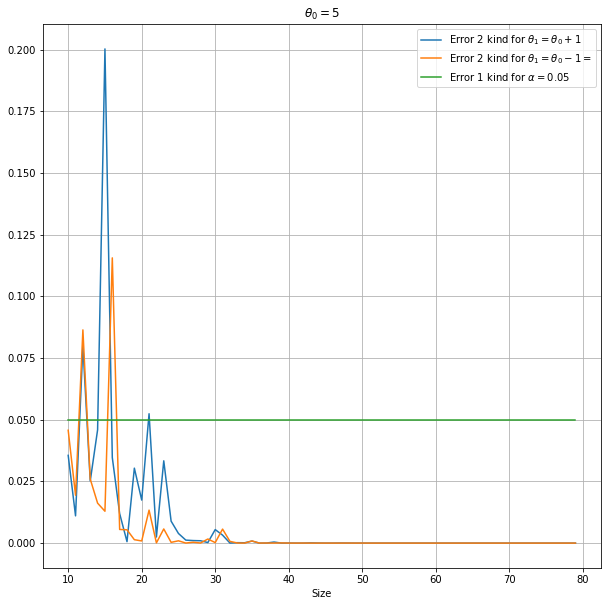

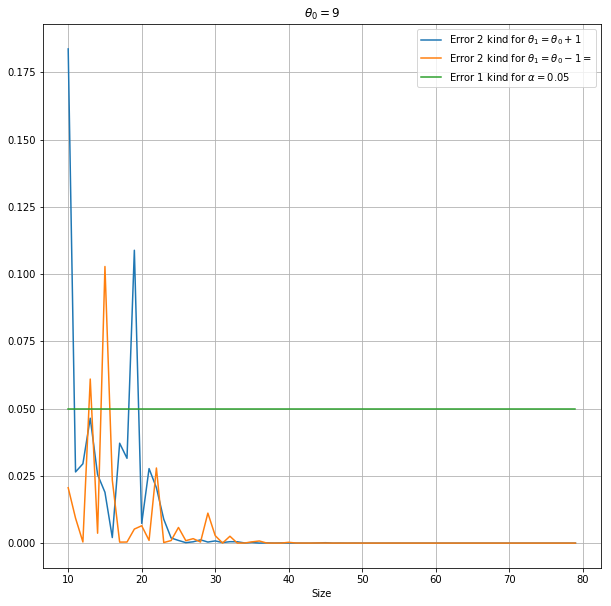

In [10]:
grid = [i for i in range(10,K)]
a = [alpha for i in range(10,K)]
for th in theta:
    plt.figure(figsize = (10,10))
    error2_1 = []
    error2_2 = []
    for n in grid:
        X_1 = norm.rvs(loc=th, size=n)
        X_2 = norm.rvs(loc=th, size=n)
        z_1 = t.ppf(1-alpha, df=n)
        error2_1.append(t.cdf(z_1 - np.sqrt(n) / var(X_1) ,df=n))
        z_2 = t.ppf(alpha, df=n)
        error2_2.append(1 - t.cdf(z_2 + np.sqrt(n) / var(X_2) ,df=n))
    plt.plot(grid, error2_1, label=r'Error 2 kind for $\theta_1 = \theta_0 + 1$')
    plt.plot(grid, error2_2, label=r'Error 2 kind for $\theta_1 = \theta_0 - 1 = $')
    plt.plot(grid, a, label = 'Error 1 kind for $\\alpha = 0.05$')
    plt.legend()
    plt.grid()
    plt.title(r'$\theta_0 = $' + str(th))
    plt.xlabel("Size")
    plt.show()

Вывод: n = 25 достаточно, чтобы вероятность ошибки 1 рода стала больше вероятности ошибки 2 рода.